In [2]:
import torch
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pyautogui


In [3]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

YOLOv5  v7.0-448-gdeec5e45 Python-3.9.25 torch-2.8.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

results = model(img)
results.print()

plt.imshow(np.squeeze(results.render()))
plt.show()

C:\Users\souza\projects\chris-ai-game-object-detection\yolov5\models\common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 3502.2ms pre-process, 97.5ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
results.render()

In [ ]:
results.crop()

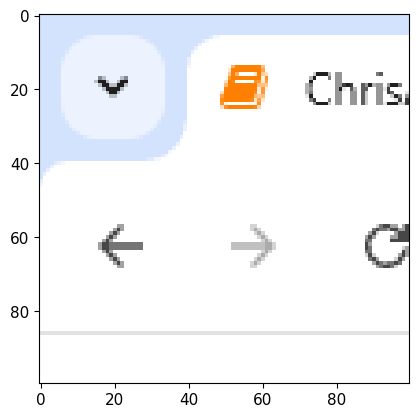

In [21]:
res = pyautogui.screenshot()
plt.imshow(np.array(res)[:100, :100])

In [ ]:
while True:
    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    #cropped_region = screen_array[25:640, 480:, :]
    h, w, _ = screen_array.shape
    x_start = w - 640
    x_end = w
    y_start = 25
    y_end = 506
    cropped_region = screen_array[y_start:y_end, x_start:x_end]
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()

In [8]:
import uuid
import os
import time

In [9]:
IMAGES_PATH = os.path.join('data', 'images')
# labels = ['left_obs', 'right_obs', 'timberman']
number_imgs = 100

In [ ]:
for img_num in range(number_imgs):
    print('Collecting image number {}'.format(img_num))

    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    #cropped_region = screen_array[25:640, 480:, :]
    h, w, _ = screen_array.shape
    x_start = w - 640
    x_end = w
    y_start = 25
    y_end = 506
    cropped_region = screen_array[y_start:y_end, x_start:x_end]
    imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgname, corrected_colors)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    time.sleep(0.2)

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()
    

In [29]:
cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

[WinError 3] O sistema não pode encontrar o caminho especificado: 'labelImg && pyrcc5 -o libs/resources.py resources.qrc'
C:\Users\souza\projects\chris-ai-game-object-detection


In [30]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --hyp hyp.scratch.yaml --weights yolov5s.pt --workers 2

In [ ]:
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/runs/train/exp5/weights/best.py')

In [ ]:
img = os.path.join('data', 'images', '')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
while True:
    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    #cropped_region = screen_array[25:640, 480:, :]
    h, w, _ = screen_array.shape
    x_start = w - 640
    x_end = w
    y_start = 25
    y_end = 506
    cropped_region = screen_array[y_start:y_end, x_start:x_end]
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)

    results = model(corrected_colors)
    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()